### Problem Statement
In the competitive restaurant industry, it's important to understand what makes a restaurant successful. This project uses data from Yelp to look at how things like reviews, tips, and check-ins from customers relate to a restaurant's review count and ratings.

### Research Objectives
1. **Measure the relationship between user engagement (reviews, tips, check-ins) and review count/average star rating:**

    This will help us understand if restaurants with more user engagement tend to receive higher reviews and ratings.

2. **Examine how sentiment affects review count and average star rating:**

    We will explore whether positive sentiments in reviews and tips lead to higher star ratings and potentially increase the total number of reviews.

3. **Investigate trends in user engagement over time:**

    We will assess whether sustained user engagement over time correlates more strongly with long-term success compared to occasional spikes in activity.

### Hypothesis Testing
 - Higher levels of user engagement (more reviews, tips, and check-ins) correlate with higher review counts and ratings for restaurants.
 - Positive sentiment expressed in reviews and tips contributes to higher overall ratings and review counts for restaurants. 
 - Consistent engagement over time is positively associated with sustained business success for restaurants. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import sqlite3 #For SQL Query
import folium #for plotting maps
from geopy.geocoders import Nominatim  #for plotting langitude and longitude of cities 
from matplotlib.colors import LinearSegmentedColormap #customized color maps
from IPython.display import display

In [2]:
#Creating a connection with the yelp.db database
conn = sqlite3.connect('yelp.db')

In [3]:
tables = pd.read_sql_query("select name from sqlite_master where type = 'table'",conn)
tables

,name
0,business
1,review
2,user
3,tip
4,checkin


In [4]:
#Exploring the data in the tables.
for table in tables['name']:
    print("Table: ", table)
    display(pd.read_sql_query(f"select * from {table} limit 5",conn))

Table:  business


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


Table:  review


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


Table:  user


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


Table:  tip


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


Table:  checkin


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


### **Data Analysis**

In [5]:
pd.read_sql_query("select * from business limit 5",conn)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


In [6]:
pd.read_sql_query("select count(*) as Total_Businesses from business",conn)

,Total_Businesses
0,150346


In [7]:
pd.read_sql_query("select count(*) as TotalRestaurants from business where lower(categories) like '%Restaurants%'",conn)

,TotalRestaurants
0,52268


In [8]:
pd.read_sql_query(" select count(*) as OpenRestaurants from business where lower(categories) like '%Restaurants%' and is_open = 1",conn)

,OpenRestaurants
0,34987


In [9]:
business_ids = pd.read_sql_query("select business_id from business where lower(categories) like '%Restaurant%' and is_open = 1",conn)
business_ids

,business_id
0,MTSW4McQd7CbVtyjqoe9mw
1,CF33F8-E6oudUQ46HnavjQ
2,bBDDEgkFA1Otx9Lfe7BZUQ
3,eEOYSgkmpB90uNA7lDOMRA
4,il_Ro8jwPlHresjw9EGmBg
...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg
35000,l9eLGG9ZKpLJzboZq-9LRQ
35001,cM6V90ExQD6KMSU3rRB5ZA
35002,WnT9NIzQgLlILjPT0kEcsQ


In [10]:
#  What is the descriptive stats for the review count and star rating for businesses?

#Business Score =  Review Counts and Ratings

#Average, Min, Max, Median  of Review Counts and Ratings --> Distribution.
pd.read_sql_query( """
    SELECT 
        AVG(review_count) AS AvgReviewCount, 
        MIN(review_count) AS MinReviewCount, 
        MAX(review_count) AS MaxReviewCount, 
        (
            SELECT review_count 
            FROM business 
            ORDER BY review_count 
            LIMIT 1 OFFSET (SELECT COUNT(*) / 2 FROM business)
        ) AS MedianReviewCount 
    FROM business 
    WHERE business_id IN {}
""".format(tuple(business_ids['business_id'])), conn)

,AvgReviewCount,MinReviewCount,MaxReviewCount,MedianReviewCount
0,104.097789,5,7568,15


In [11]:
pd.read_sql_query("""select avg(stars) as AvgStars, min(stars) as MinStars, max(stars) as MaxStars,
                  (select stars from business order by stars limit 1 offset 
                  (select count(*) / 2 from business)) as MedianStars 
                  from business
                  where business_id in {}
""".format(tuple(business_ids['business_id'])),conn)

,AvgStars,MinStars,MaxStars,MedianStars
0,3.523969,1.0,5.0,3.5


Based on this observation, it is evident that there are outliers in the data, characterized by significantly higher values in MaxReviewCount compared to MedianReviewCount. These outliers suggest the presence of restaurants with exceptionally high review counts. To ensure our analysis is not unduly influenced by these outliers, we will proceed by removing them from the dataset.

In [12]:
#Function to remove Outliers.
# Keeping only those, who fall in the lower and upper bound, the rest are dropped
def removeOutliers(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.72)
    iqr = q3 - q1
    lowerBound = q1 - 1.5 * iqr
    upperBound = q3 + 1.5 * iqr
    df = df[(df[column]>=lowerBound) & (df[column]<=upperBound)]
    return df

In [13]:
business_ids = pd.read_sql_query("select business_id,review_count from business where lower(categories) like '%Restaurant%' and is_open = 1",conn)
business_ids

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg,998
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


In [14]:
business_ids = removeOutliers(business_ids,'review_count')

In [15]:
business_ids.shape

(30748, 2)

In [16]:
# Rerunning the same query to check the distribution

pd.read_sql_query( """
    SELECT 
        AVG(review_count) AS AvgReviewCount, 
        MIN(review_count) AS MinReviewCount, 
        MAX(review_count) AS MaxReviewCount, 
        (
            SELECT review_count 
            FROM business 
            ORDER BY review_count 
            LIMIT 1 OFFSET (SELECT COUNT(*) / 2 FROM business)
        ) AS MedianReviewCount 
    FROM business 
    WHERE business_id IN {}
""".format(tuple(business_ids['business_id'])), conn)

,AvgReviewCount,MinReviewCount,MaxReviewCount,MedianReviewCount
0,51.50413,5,213,15


In [17]:
# Which restaurants have the highest number of Ratings

pd.read_sql_query(""" select name as BusinessName, sum(review_count) as review_count, avg(stars) as AvgRating from business where business_id in {} group by name order by review_count desc limit 10
""".format(tuple(business_ids['business_id'])),conn)

,BusinessName,review_count,AvgRating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7455,3.373377
4,Panera Bread,6613,2.661905
5,Buffalo Wild Wings,6253,2.350877
6,Domino's Pizza,6091,2.290210
7,Wendy's,5930,2.030159
8,Chili's,5744,2.514706
9,Applebee's Grill + Bar,5515,2.534314


In [18]:
pd.read_sql_query(""" select name as BusinessName, sum(review_count) as review_count, avg(stars) as AvgRating from business where business_id in {} group by name order by stars desc limit 10
""".format(tuple(business_ids['business_id'])),conn)

,BusinessName,review_count,AvgRating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


Based on this observation, we can conclude that there is no direct relation between review_count and Avg Rating.

In [19]:
#Do restaurants with higher engagement tend to have higher rating?

# Success Score--> AvgRating, Review_count.
                # -->
#Finding the relation between Engagement with Rating.
# Engagement -> ReviewCount, TipCount and Checkin count.
# AvgTipCount, Avg Checkin Count AvgReviewCount.


# 3 Tables: Business, tip, checkin

# In Checkin Table, there are multiple entries for a businessid.
# we have to Calculate Tip count for each business
#REview Count can be gathered from the business table.

In [20]:
pd.read_sql_query("select * from checkin limit 5",conn)

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [21]:
# Calculating checkin counts.
# By subtracting the length of the string without commas from the original length and adding 1,
# we get the count of commas (which corresponds to the number of check-ins plus one).
pd.read_sql_query("""select 
                  business_id,length(date)-length(replace(date,',','')+1) as checkinCount 
                  from 
                  checkin 
                  group by 
                  business_id"""
                  ,conn)

,business_id,checkinCount
0,---kPU91CF4Lq2-WlRu9Lw,225
1,--0iUa4sNDFiZFrAdIWhZQ,204
2,--30_8IhuyMHbSOcNWd6DQ,36
3,--7PUidqRWpRSpXebiyxTg,204
4,--7jw19RH9JKXgFohspgQw,540
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,1401
131926,zznZqH9CiAznbkV6fXyHWA,15
131927,zzu6_r3DxBJuXcjnOYVdTw,477
131928,zzw66H6hVjXQEt0Js3Mo4A,36


In [22]:
pd.read_sql_query("select * from tip limit 5",conn)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [23]:
pd.read_sql_query("""
select business_id, count(*) as TipCount from tip group by business_id
""",conn)

,business_id,TipCount
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [24]:
# pd.read_sql_query("""SELECT total.avg_rating AS Rating,
#        AVG(total.review_count) AS AvgReviewCount,
#        AVG(total.checkin_count) AS AvgCheckinCount,
#        AVG(total.tip_count) AS AvgTipCount
# FROM
#   (SELECT b.business_id,
#           SUM(b.review_count) AS review_count,
#           AVG(r.stars) AS avg_rating,
#           SUM(LENGTH(cc.date) - LENGTH(REPLACE(date, ',', '')) + 1) AS checkin_count,
#           COALESCE(t.tip_count, 0) AS tip_count
#    FROM business b
#    LEFT JOIN checkin cc ON b.business_id = cc.business_id
#    LEFT JOIN (SELECT business_id,
#                      COUNT(*) AS tip_count
#               FROM tip
#               GROUP BY business_id) AS t ON b.business_id = t.business_id
#    LEFT JOIN (SELECT business_id,
#                      stars
#               FROM review) AS r ON b.business_id = r.business_id
#    GROUP BY b.business_id) AS total
# GROUP BY total.avg_rating
# ORDER BY total.avg_rating;
# """,conn)

In [25]:
business_id_tuple = tuple(business_ids['business_id'])

In [26]:
review_count_df = pd.read_sql_query(f"""
    SELECT
        total.avg_rating AS Rating,
        AVG(total.review_count) AS AvgReviewCount,
        AVG(total.checkin_count) as AvgCheckinCount,
        AVG(total.tip_count) AS AvgTipCount
    FROM
        (SELECT
            b.business_id,
            SUM(b.review_count) AS review_count,
            AVG(b.stars) AS avg_rating,
            SUM(length(cc.date) - length(replace(cc.date, ',', '')) + 1) AS checkin_count,
            SUM(t.tip_count) AS tip_count
        FROM
            business b 
            LEFT JOIN checkin cc ON b.business_id = cc.business_id
            LEFT JOIN (
                SELECT business_id, COUNT(*) AS tip_count
                FROM tip
                GROUP BY business_id
            ) AS t ON b.business_id = t.business_id
        WHERE b.business_id IN {business_id_tuple}
        GROUP BY b.business_id) AS total
    GROUP BY total.avg_rating
""", conn)
review_count_df

,Rating,AvgReviewCount,AvgCheckinCount,AvgTipCount
0,1.0,14.365079,17.518072,2.781513
1,1.5,24.358459,34.480969,3.884654
2,2.0,27.462825,51.598193,4.502790
3,2.5,35.267510,76.884653,6.135094
4,3.0,45.572056,101.413971,7.954415
5,3.5,58.749728,114.885840,9.569280
6,4.0,65.812587,112.078969,10.217962
7,4.5,59.720422,77.092447,8.208201
8,5.0,29.928064,25.912015,4.006527


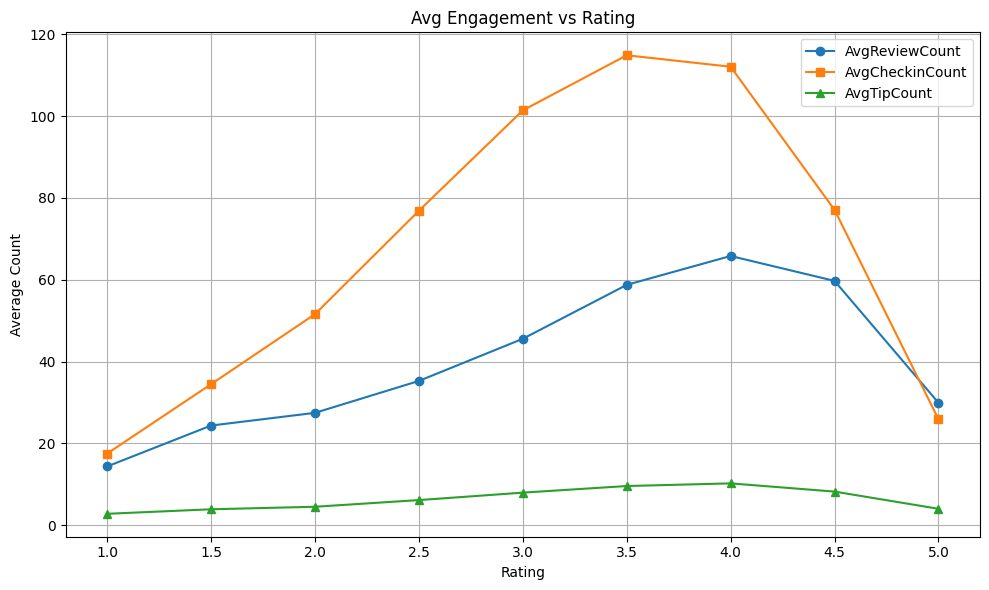

In [27]:
plt.figure(figsize=(10, 6))

plt.plot(review_count_df['Rating'], review_count_df['AvgReviewCount'], marker='o', label='AvgReviewCount')
plt.plot(review_count_df['Rating'], review_count_df['AvgCheckinCount'], marker='s', label='AvgCheckinCount')
plt.plot(review_count_df['Rating'], review_count_df['AvgTipCount'], marker='^', label='AvgTipCount')

plt.xlabel('Rating')
plt.ylabel('Average Count')
plt.title('Avg Engagement vs Rating')
plt.xticks(review_count_df['Rating'])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
engagement_df = pd.read_sql_query(f"""SELECT
            b.business_id,
            SUM(b.review_count) AS review_count,
            AVG(b.stars) AS avg_rating,
            SUM(length(cc.date) - length(replace(cc.date, ',', '')) + 1) AS checkin_count,
            SUM(t.tip_count) AS tip_count
        FROM
            business b 
            LEFT JOIN checkin cc ON b.business_id = cc.business_id
            LEFT JOIN (
                SELECT business_id, COUNT(*) AS tip_count
                FROM tip
                GROUP BY business_id
            ) AS t ON b.business_id = t.business_id
        WHERE b.business_id IN {business_id_tuple}
        GROUP BY b.business_id
""", conn).dropna()
engagement_df

,business_id,review_count,avg_rating,checkin_count,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0
5,-09Oc2D14vRnmirPh0vlXw,135,3.0,500.0,25.0
...,...,...,...,...,...
30741,zzIF9qp2UoHN48EeZH_IDg,19,3.0,6.0,5.0
30743,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0
30744,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0
30745,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0


In [29]:
coorelation = engagement_df[['review_count','checkin_count','tip_count']].corr()
coorelation

,review_count,checkin_count,tip_count
review_count,1.000000,0.600036,0.744472
checkin_count,0.600036,1.000000,0.746671
tip_count,0.744472,0.746671,1.000000


<Axes: >

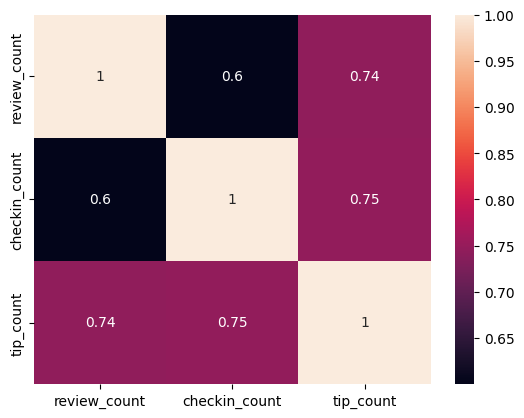

In [30]:
sns.heatmap(coorelation, annot=True)

In [31]:
#is there a difference between the user engagement between high-rated and low-rated restaurants?
pd.read_sql_query(f"""
SELECT
            b.business_id,
            SUM(b.review_count) AS review_count,
            AVG(b.stars) AS avg_rating,
            SUM(length(cc.date) - length(replace(cc.date, ',', '')) + 1) AS checkin_count,
            SUM(t.tip_count) AS tip_count,
            (CASE WHEN b.stars >=3.5 
            THEN 
                'HighRated'
            ELSE
                'LowRated'
            END) as Category
            FROM
            business b 
            LEFT JOIN checkin cc ON b.business_id = cc.business_id
            LEFT JOIN (
                SELECT business_id, COUNT(*) AS tip_count
                FROM tip
                GROUP BY business_id
            ) AS t ON b.business_id = t.business_id
        WHERE b.business_id IN {business_id_tuple}
        GROUP BY b.business_id
""", conn).dropna()

,business_id,review_count,avg_rating,checkin_count,tip_count,Category
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0,HighRated
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0,LowRated
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0,LowRated
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0,LowRated
5,-09Oc2D14vRnmirPh0vlXw,135,3.0,500.0,25.0,LowRated
...,...,...,...,...,...,...
30741,zzIF9qp2UoHN48EeZH_IDg,19,3.0,6.0,5.0,LowRated
30743,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0,LowRated
30744,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0,HighRated
30745,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0,HighRated


In [32]:
pd.read_sql_query(f"""
    SELECT
        Category,
        AVG(review_count) AS AvgReviewCount,
        AVG(tip_count) AS AvgTipCount,
        AVG(checkin_count) AS AvgCheckinCount
    FROM
        (SELECT
            b.business_id,
            SUM(b.review_count) AS review_count,
            AVG(b.stars) AS avg_rating,
            SUM(length(cc.date) - length(replace(cc.date, ',', '')) + 1) AS checkin_count,
            SUM(t.tip_count) AS tip_count,
            (CASE WHEN b.stars >= 3.5 
                  THEN 'HighRated'
                  ELSE 'LowRated' 
             END) AS Category
        FROM
            business b 
            LEFT JOIN checkin cc ON b.business_id = cc.business_id
            LEFT JOIN (
                SELECT business_id, COUNT(business_id) AS tip_count
                FROM tip
                GROUP BY business_id
            ) AS t ON b.business_id = t.business_id
        WHERE b.business_id IN {business_id_tuple}
        GROUP BY b.business_id, Category) AS subquery
    GROUP BY Category
""", conn).dropna()

,Category,AvgReviewCount,AvgTipCount,AvgCheckinCount
0,HighRated,59.930173,9.227997,99.444655
1,LowRated,36.252239,6.285836,76.194429


#High Rated ki engagement high hai as compared to low rated restaurants. 

In [33]:
def get_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating']* np.log(row['review_count'] + 1)
        success_score.append(score)
    return success_score

In [34]:
#how do the success metrics (review_count & avg_rating) of restaurants 
# vary across different states and cities

city_df = pd.read_sql_query(f"""
SELECT city, state,latitude,longitude, 
                  avg(stars) as avg_rating,
                  sum(review_count) as review_count,
                  count(*) as restaurant_count 
                  from
                  business
                  where 
                  business_id in {business_id_tuple}
group by
state, city
order by
review_count desc 
limit 10
""",conn)
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count
0,Philadelphia,PA,39.955505,-75.155564,3.520028,151288,2896
1,Tampa,FL,27.890814,-82.502346,3.556962,91434,1659
2,Indianapolis,IN,39.637133,-86.127217,3.395293,82543,1657
3,Tucson,AZ,32.338572,-111.010760,3.372356,80511,1371
4,Nashville,TN,36.208102,-86.768170,3.483432,76468,1358
5,New Orleans,LA,29.963974,-90.042604,3.687372,60485,974
6,Edmonton,AB,53.436403,-113.604288,3.509073,45216,1543
7,Saint Louis,MO,38.583223,-90.407187,3.395513,44446,780
8,Reno,NV,39.476518,-119.784037,3.460644,41418,559
9,Boise,ID,43.611192,-116.206275,3.545788,32684,546


In [35]:
city_df['success_score'] = get_success_metric(city_df)
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.520028,151288,2896,41.983184
1,Tampa,FL,27.890814,-82.502346,3.556962,91434,1659,40.632542
2,Indianapolis,IN,39.637133,-86.127217,3.395293,82543,1657,38.438403
3,Tucson,AZ,32.338572,-111.010760,3.372356,80511,1371,38.094677
4,Nashville,TN,36.208102,-86.768170,3.483432,76468,1358,39.169936
5,New Orleans,LA,29.963974,-90.042604,3.687372,60485,974,40.598579
6,Edmonton,AB,53.436403,-113.604288,3.509073,45216,1543,37.614557
7,Saint Louis,MO,38.583223,-90.407187,3.395513,44446,780,36.338957
8,Reno,NV,39.476518,-119.784037,3.460644,41418,559,36.791819
9,Boise,ID,43.611192,-116.206275,3.545788,32684,546,36.857297


In [36]:
# Initialize the base map
map = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)

# Determine the range of success_score for setting up the colormap
vmin = city_df['success_score'].min()
vmax = city_df['success_score'].max()

# Define a list of colors for the colormap (adjust as needed)
color_scale = folium.LinearColormap(
    colors=['green', 'yellow', 'red'],  # Example: Green to Yellow to Red gradient
    vmin=vmin,
    vmax=vmax
)

# Iterate through each row in the DataFrame to add CircleMarkers
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_scale(row['success_score']),
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']}"
    ).add_to(map)

# Add the color scale to the map
map.add_child(color_scale)

# Display the map
map

In [37]:
#The chances of restaurant business to be a success are higher in these cities

In [38]:
#Are there any patterns in user engagement over time for sucessful business compared to less sucessful ones?
#Are there any seasonal trends.

high_rated_engagement = pd.read_sql_query(f"""SELECT review.month_year, review.review_count, tip.tip_count 
                                          FROM (
                                            SELECT
                                                strftime('%m-%Y',date) as month_year, count(*) as review_count
                                            FROM 
                                                review
                                            WHERE
                                                business_id in {business_id_tuple} and stars>=3.5
                                            group by
                                            month_year
                                            order by
                                            month_year)
                                            as review
                                          JOIN
                                          (
                                          select
                                          avg(b.stars),strftime('%m-%Y',date) as month_year, count(*) as tip_count
                                          from
                                          tip
                                          JOIN
                                          business as b
                                          on tip.business_id = b.business_id
                                          where tip.business_id in {business_id_tuple} and b.stars >=3.5
                                          group by
                                          month_year
                                          order by
                                          month_year) as tip
                                          on review.month_year = tip.month_year;""",conn)
high_rated_engagement

,month_year,review_count,tip_count
0,01-2010,1039,71
1,01-2011,1891,529
2,01-2012,2709,1118
3,01-2013,3345,1085
4,01-2014,4343,1183
...,...,...,...
149,12-2017,8894,1320
150,12-2018,11368,1013
151,12-2019,12413,1048
152,12-2020,10436,853


In [39]:
low_rated_engagement = pd.read_sql_query(f"""SELECT review.month_year, review.review_count, tip.tip_count 
                                          FROM (
                                            SELECT
                                                strftime('%m-%Y',date) as month_year, count(*) as review_count
                                            FROM 
                                                review
                                            WHERE
                                                business_id in {business_id_tuple} and stars<3.5
                                            group by
                                            month_year
                                            order by
                                            month_year)
                                            as review
                                          JOIN
                                          (
                                          select
                                          avg(b.stars),strftime('%m-%Y',date) as month_year, count(*) as tip_count
                                          from
                                          tip
                                          JOIN
                                          business as b
                                          on tip.business_id = b.business_id
                                          where tip.business_id in {business_id_tuple} and b.stars <3.5
                                          group by
                                          month_year
                                          order by
                                          month_year) as tip
                                          on review.month_year = tip.month_year;""",conn)
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,548,25
1,01-2011,957,278
2,01-2012,1548,515
3,01-2013,1983,529
4,01-2014,2500,573
...,...,...,...
149,12-2017,5481,423
150,12-2018,6941,326
151,12-2019,7064,273
152,12-2020,4698,146


In [40]:
time_rating = pd.read_sql_query(f"""select strftime('%m-%Y',date) as month_year, avg(stars) as avg_rating from review where business_id in {business_id_tuple}
group by month_year
order by month_year""",conn)

In [41]:
time_rating.head()

,month_year,avg_rating
0,01-2006,4.027027
1,01-2007,3.857143
2,01-2008,3.603053
3,01-2009,3.682366
4,01-2010,3.698173


In [42]:
# #We only need data after 2017 to analyze the recent trends. also the date is in string we have to convert it in date time format.
# time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
# time_rating = time_rating.sort_values('month_year',inplace=True)
# time_rating = time_rating[time_rating['month_year']> '2017'] 

# high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
# high_rated_engagement = high_rated_engagement.sort_values('month_year',inplace=True)
# high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year']> '2017'] 

# low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
# low_rated_engagement = low_rated_engagement.sort_values('month_year',inplace=True)
# low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year']> '2017'] 

In [43]:
print("Initial time_rating dataframe:")
display(time_rating.head())

print("Initial high_rated_engagement dataframe:")
display(high_rated_engagement.head())

print("Initial low_rated_engagement dataframe:")
display(low_rated_engagement.head())

try:
    time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
    time_rating = time_rating.sort_values('month_year')
    time_rating = time_rating[time_rating['month_year'] > pd.to_datetime('2017-01-01')]
    print("Processed time_rating dataframe:")
    display(time_rating.head())
except Exception as e:
    print(f"Error processing time_rating: {e}")

try:
    high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
    high_rated_engagement = high_rated_engagement.sort_values('month_year')
    high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year'] > pd.to_datetime('2017-01-01')]
    print("Processed high_rated_engagement dataframe:")
    display(high_rated_engagement.head())
except Exception as e:
    print(f"Error processing high_rated_engagement: {e}")

try:
    low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
    low_rated_engagement = low_rated_engagement.sort_values('month_year')
    low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year'] > pd.to_datetime('2017-01-01')]
    print("Processed low_rated_engagement dataframe:")
    display(low_rated_engagement.head())
except Exception as e:
    print(f"Error processing low_rated_engagement: {e}")

Initial time_rating dataframe:


,month_year,avg_rating
0,01-2006,4.027027
1,01-2007,3.857143
2,01-2008,3.603053
3,01-2009,3.682366
4,01-2010,3.698173


Initial high_rated_engagement dataframe:


,month_year,review_count,tip_count
0,01-2010,1039,71
1,01-2011,1891,529
2,01-2012,2709,1118
3,01-2013,3345,1085
4,01-2014,4343,1183


Initial low_rated_engagement dataframe:


,month_year,review_count,tip_count
0,01-2010,548,25
1,01-2011,957,278
2,01-2012,1548,515
3,01-2013,1983,529
4,01-2014,2500,573


Processed time_rating dataframe:


C:\Users\MM COMPUTERS\AppData\Local\Temp\ipykernel_13016\1468586919.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])


,month_year,avg_rating
28,2017-02-01,3.607818
45,2017-03-01,3.610155
62,2017-04-01,3.599362
79,2017-05-01,3.603804
96,2017-06-01,3.641215


Processed high_rated_engagement dataframe:


C:\Users\MM COMPUTERS\AppData\Local\Temp\ipykernel_13016\1468586919.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])


,month_year,review_count,tip_count
20,2017-02-01,8415,1466
32,2017-03-01,9549,1847
45,2017-04-01,9414,1851
58,2017-05-01,10107,1759
71,2017-06-01,10211,1762


Processed low_rated_engagement dataframe:


C:\Users\MM COMPUTERS\AppData\Local\Temp\ipykernel_13016\1468586919.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])


,month_year,review_count,tip_count
20,2017-02-01,4964,440
32,2017-03-01,5557,531
45,2017-04-01,5637,548
58,2017-05-01,6034,591
71,2017-06-01,5793,531


In [44]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

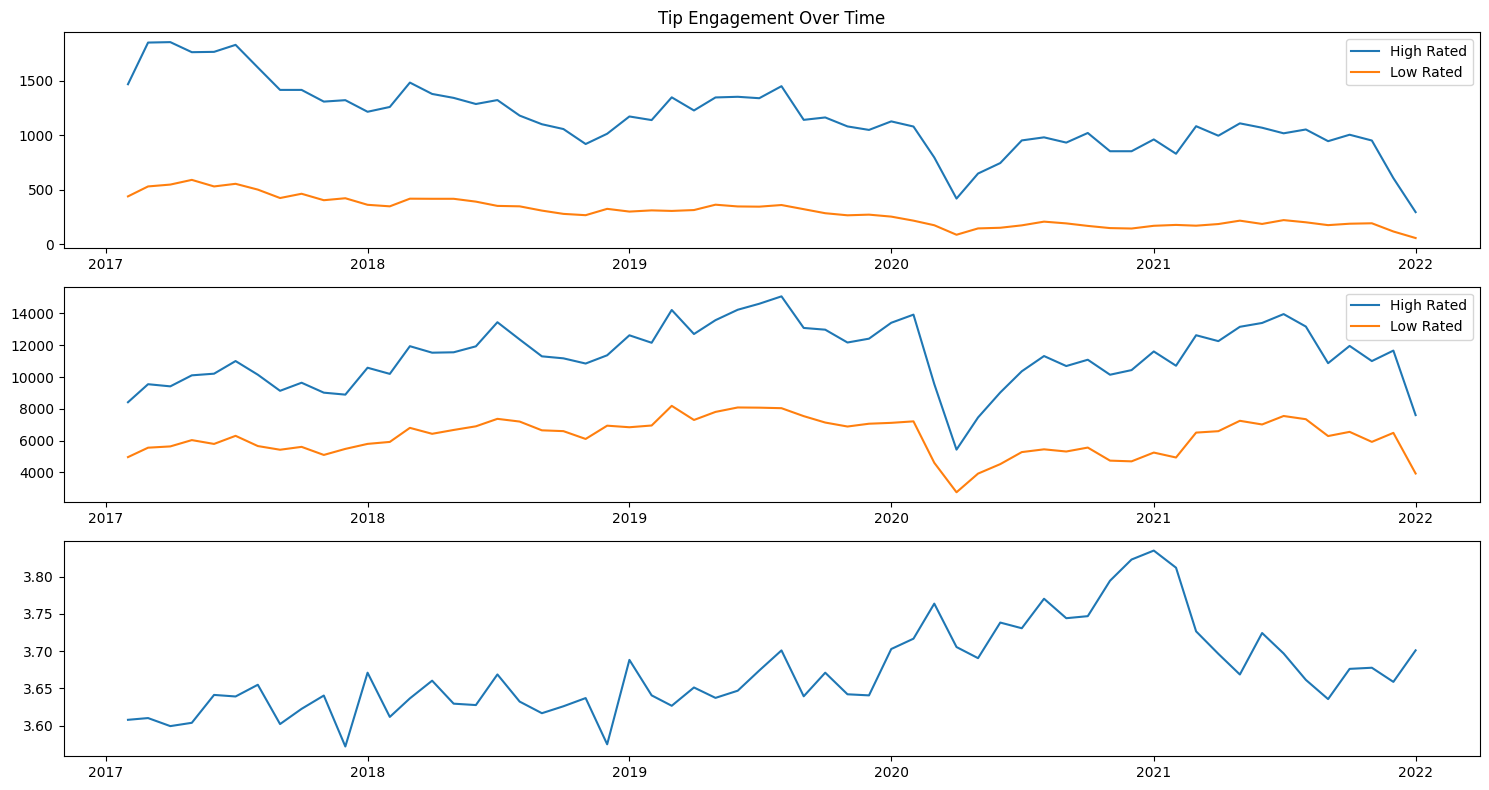

In [45]:
plt.figure(figsize=(15,8))
plt.subplot(3,1,1)
plt.title("Tip Engagement Over Time")

plt.plot(high_rated_engagement['month_year'],high_rated_engagement['tip_count'],label='High Rated')
plt.plot(low_rated_engagement['month_year'],low_rated_engagement['tip_count'],label='Low Rated')
plt.legend()

plt.subplot(3,1,2)
plt.plot(high_rated_engagement['month_year'],high_rated_engagement['review_count'],label='High Rated')
plt.plot(low_rated_engagement['month_year'],low_rated_engagement['review_count'],label='Low Rated')
plt.legend()

plt.subplot(3,1,3)
plt.plot(time_rating['month_year'],time_rating['avg_rating'])
plt.tight_layout()

plt.show()

In [46]:
tip_high_rated = high_rated_engagement[['month_year','tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year','review_count']].set_index('month_year')
rating_df  = high_rated_engagement[['month_year','avg_rating']].set_index('month_year')

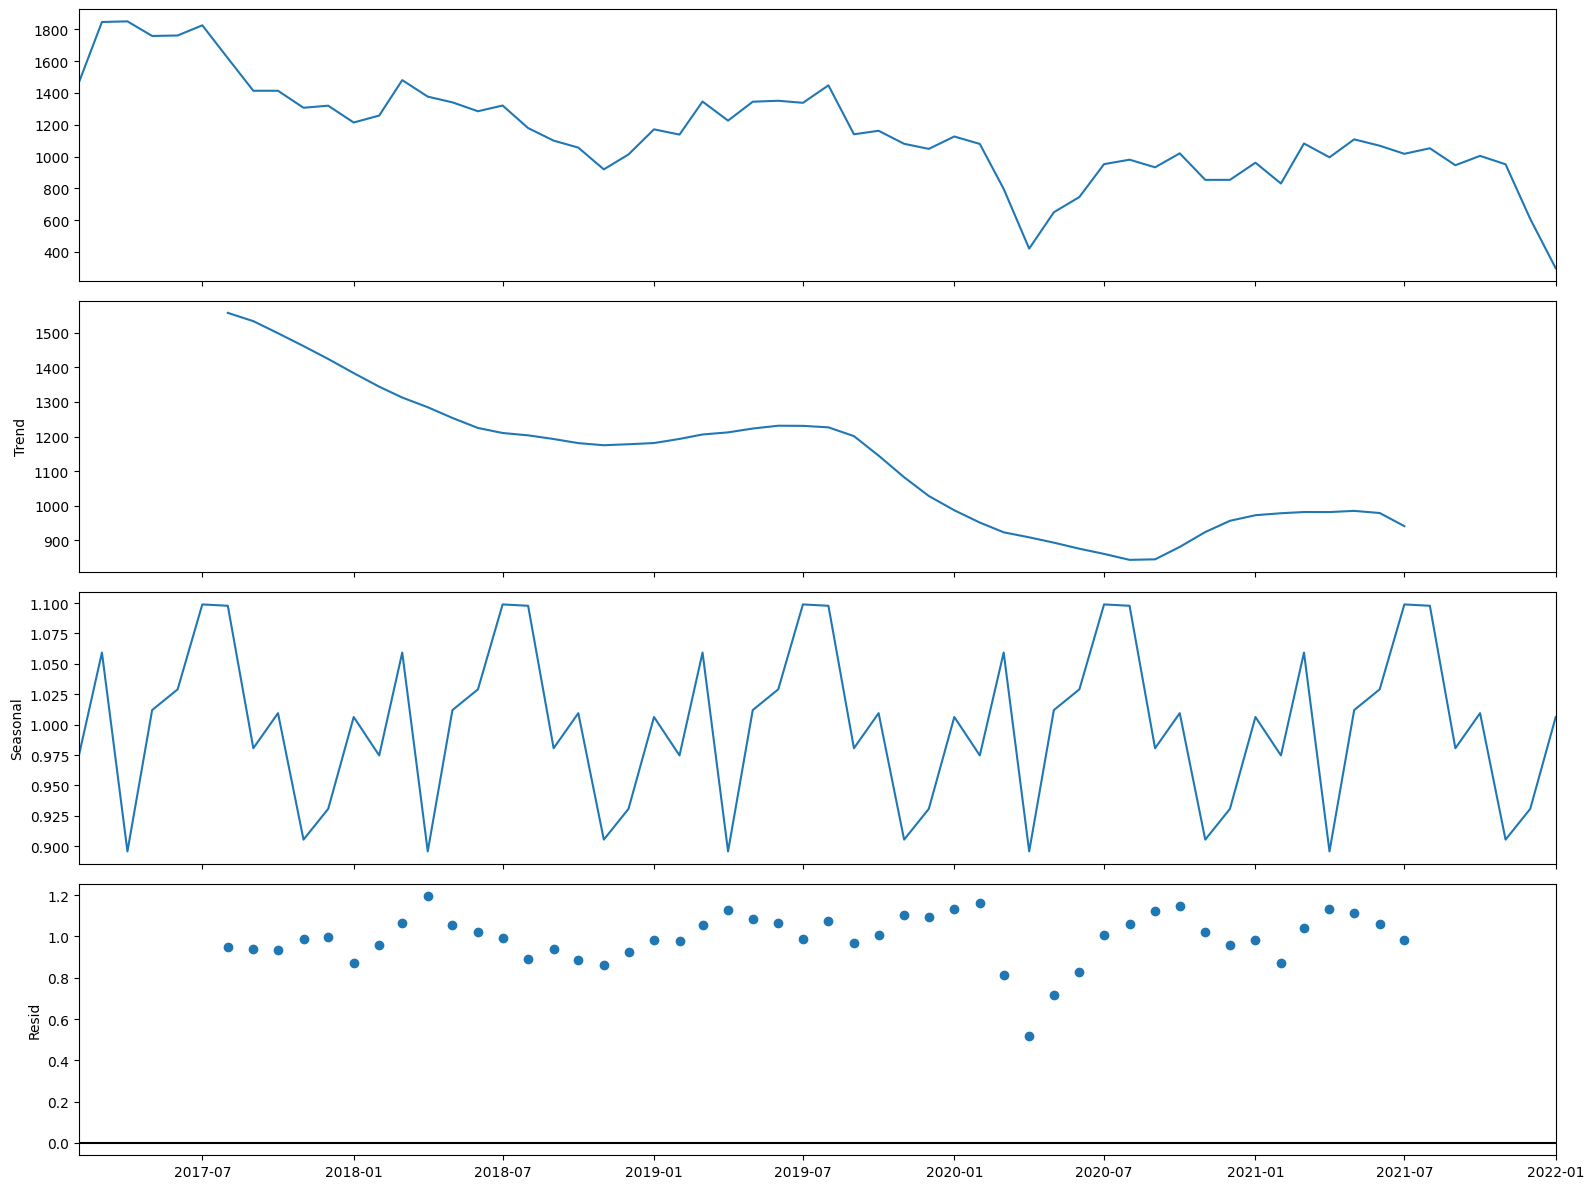

In [47]:
#to plot seasonal trends.
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated,model='multiplicative',period=12)
plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_decomposition.plot()
plt.show()

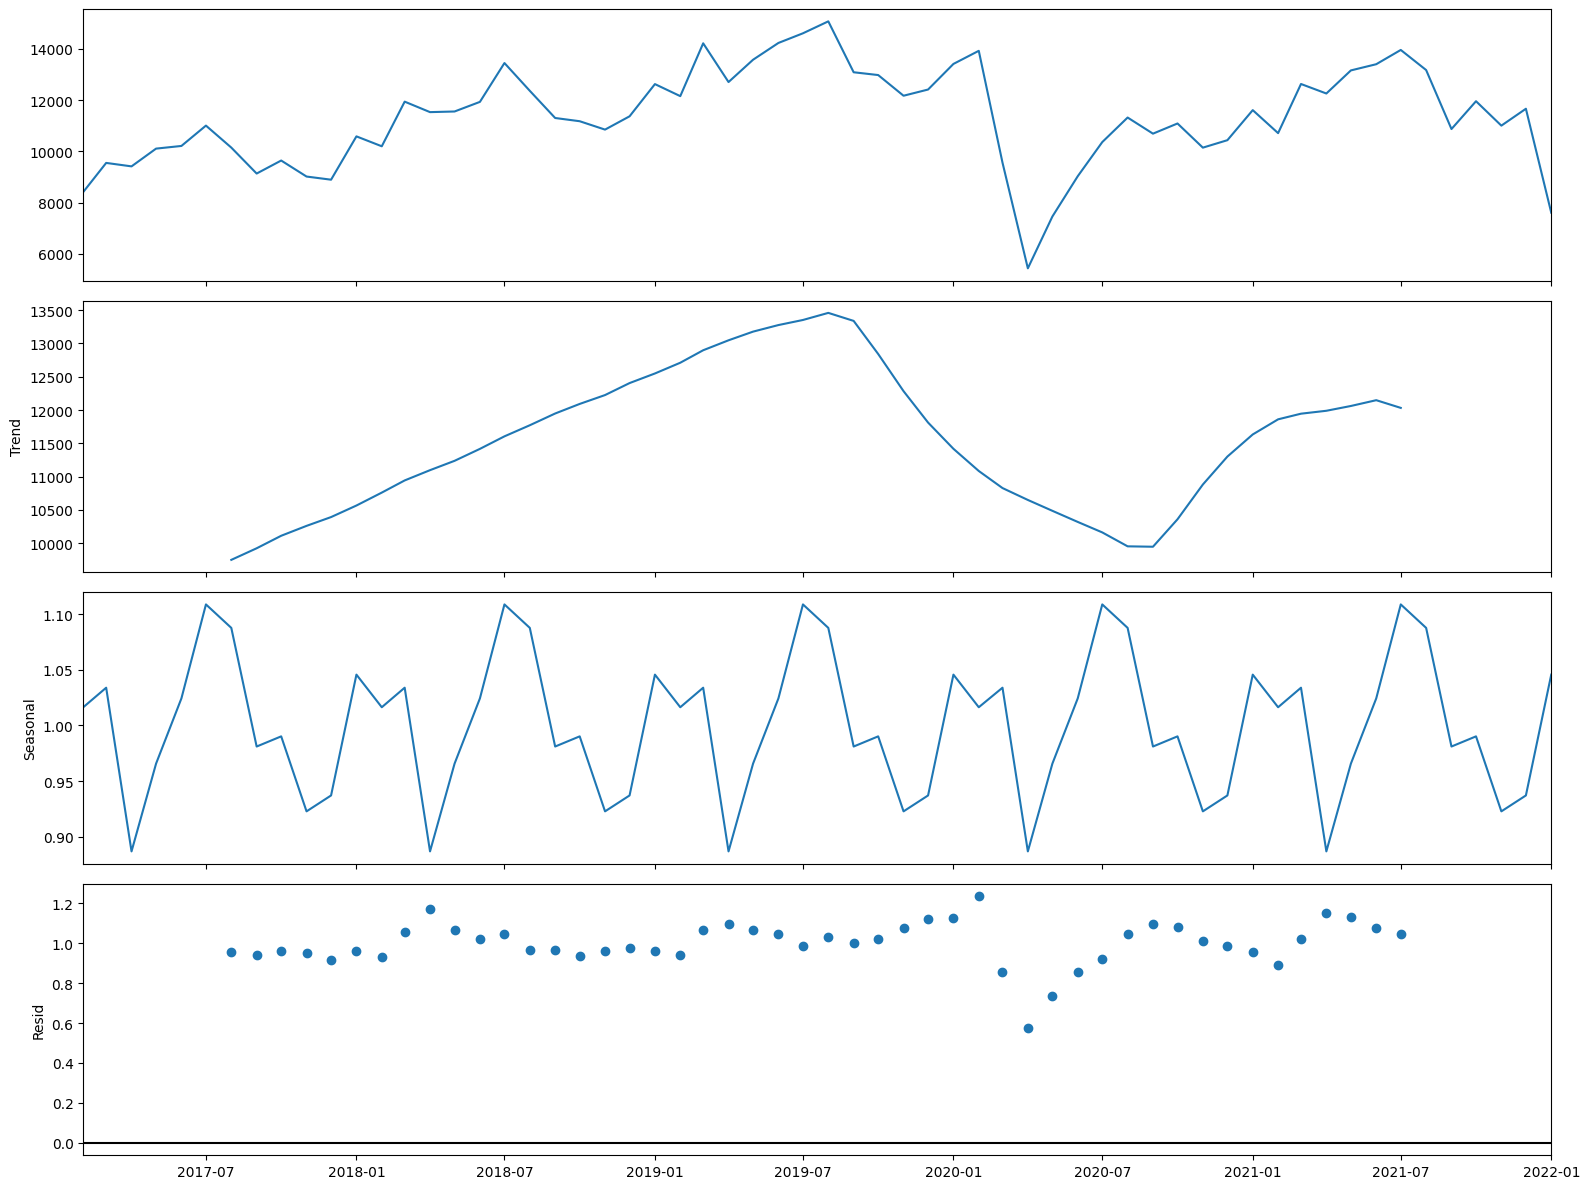

In [48]:
multiplicative_decomposition = seasonal_decompose(review_high_rated,model='multiplicative',period=12)
plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_decomposition.plot()
plt.show()

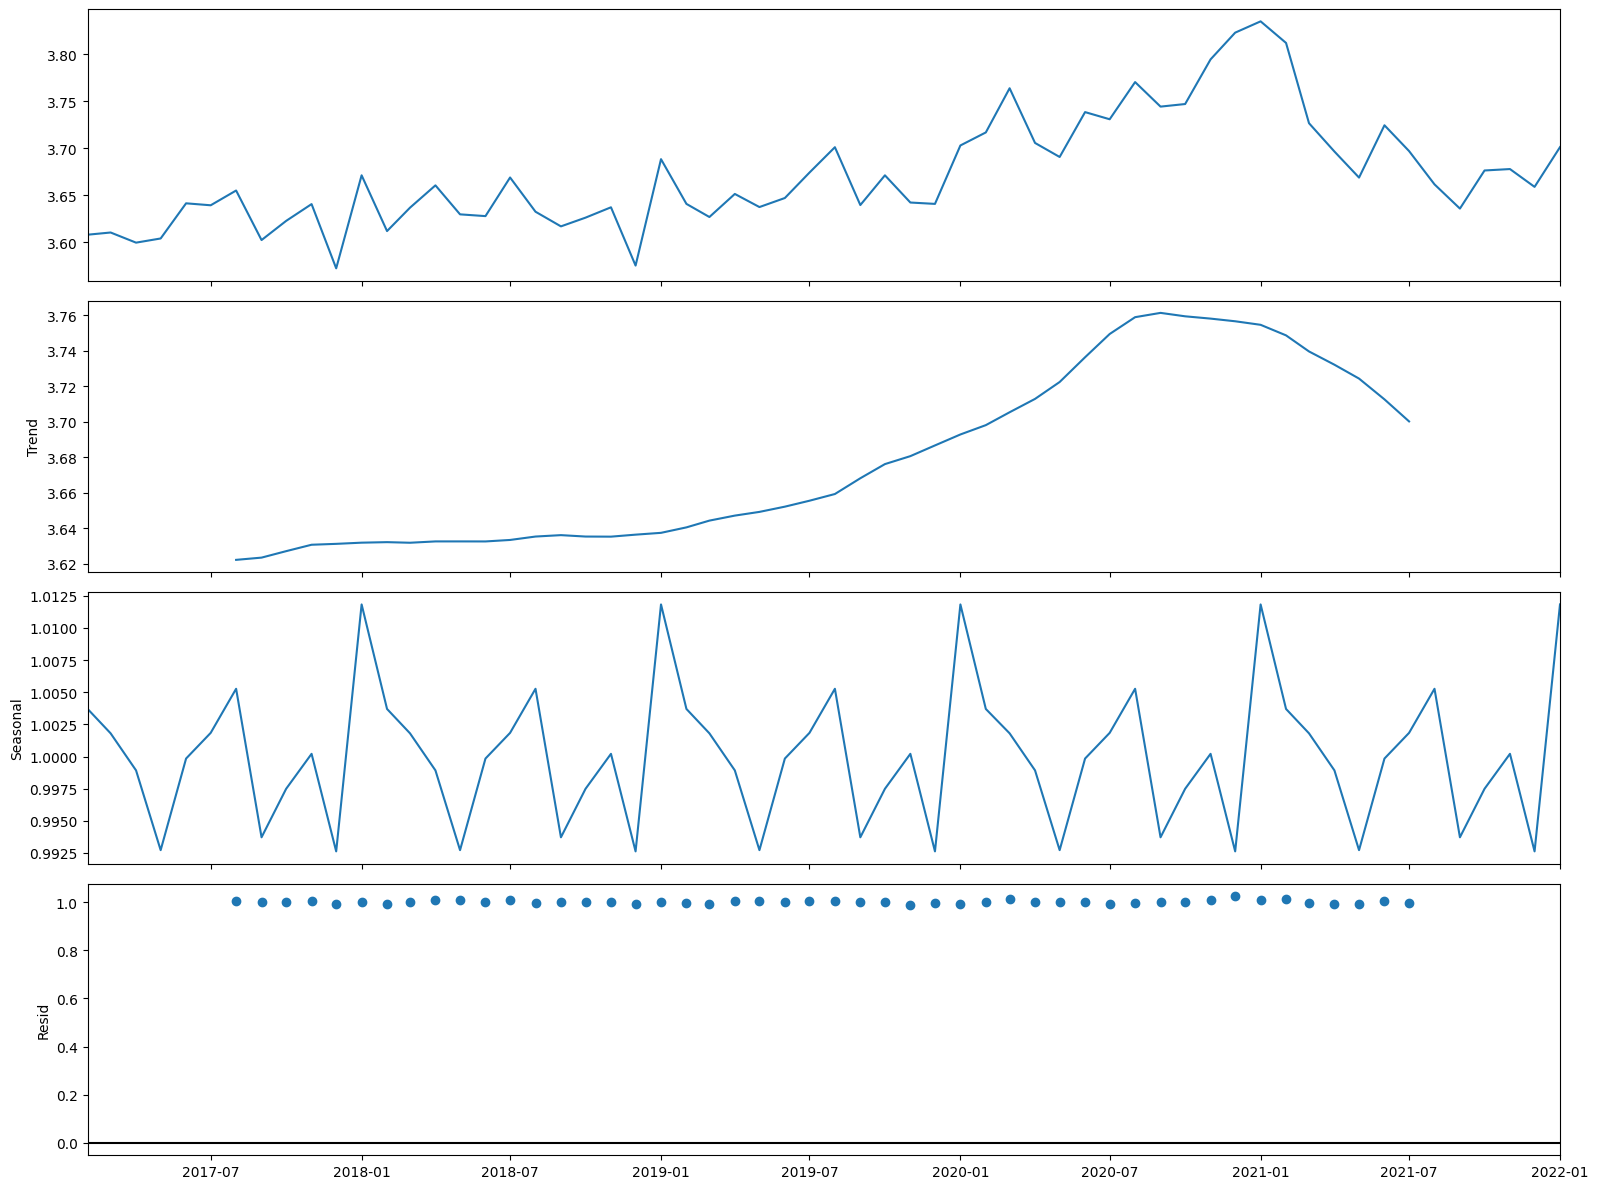

In [49]:
multiplicative_decomposition = seasonal_decompose(rating_df,model='multiplicative',period=12)
plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_decomposition.plot()
plt.show()

In [50]:
#How does the sentiment of reviews and tips (useful,funny,cool) coorelate with the success metrics of restaurants?
sentiment_df = pd.read_sql_query(f"""select b.business_id, avg(b.stars) as avg_rating, sum(b.review_count) as review_count,
                  sum(s.useful_count) as useful_count, sum(s.funny_count) as funny_count, sum(s.cool_count) as cool_count 
                  from
                  (select business_id, sum(useful) as useful_count,
                  sum(funny) as funny_count,
                  sum(cool) as cool_count 
                  from 
                  review
                  group by business_id) as s
                  join business as b on b.business_id = s.business_id
                  where b.business_id in {business_id_tuple} group by b.business_id 
                  order by review_count
""",conn)
sentiment_df

,business_id,avg_rating,review_count,useful_count,funny_count,cool_count
0,-2CPhK6ik9ZBgFX_F-dkxQ,2.0,5,3,5,3
1,-3ArWZfDjfab8qVHf3WVtg,4.0,5,18,3,2
2,-4lNMmoW7gRxkH0c2dfXfA,4.0,5,1,0,0
3,-7UDKbg_8TL4LVuYR6Ooyw,3.0,5,3,0,2
4,-AzaeuPwxqFO4SMSKjbuCw,3.0,5,5,0,0
...,...,...,...,...,...,...
30743,rOh8NovXVn48p8I-ZYEpQA,4.0,213,199,62,103
30744,rPVmM0aJbC6lU_mnDiZ2Rw,4.0,213,227,89,125
30745,tAGfqftHHb6M1QsYEZtFHA,4.0,213,143,25,69
30746,vKBQmHjx5K9cYoGqWLyBhQ,3.0,213,116,47,38


In [51]:
sentiment_df=removeOutliers(sentiment_df,'review_count')
sentiment_df=removeOutliers(sentiment_df,'useful_count')
sentiment_df=removeOutliers(sentiment_df,'funny_count')
sentiment_df=removeOutliers(sentiment_df,'cool_count')

In [52]:
sentiment_df.shape

(22396, 6)

In [53]:
sentiment_df['success_score'] = get_success_metric(sentiment_df)

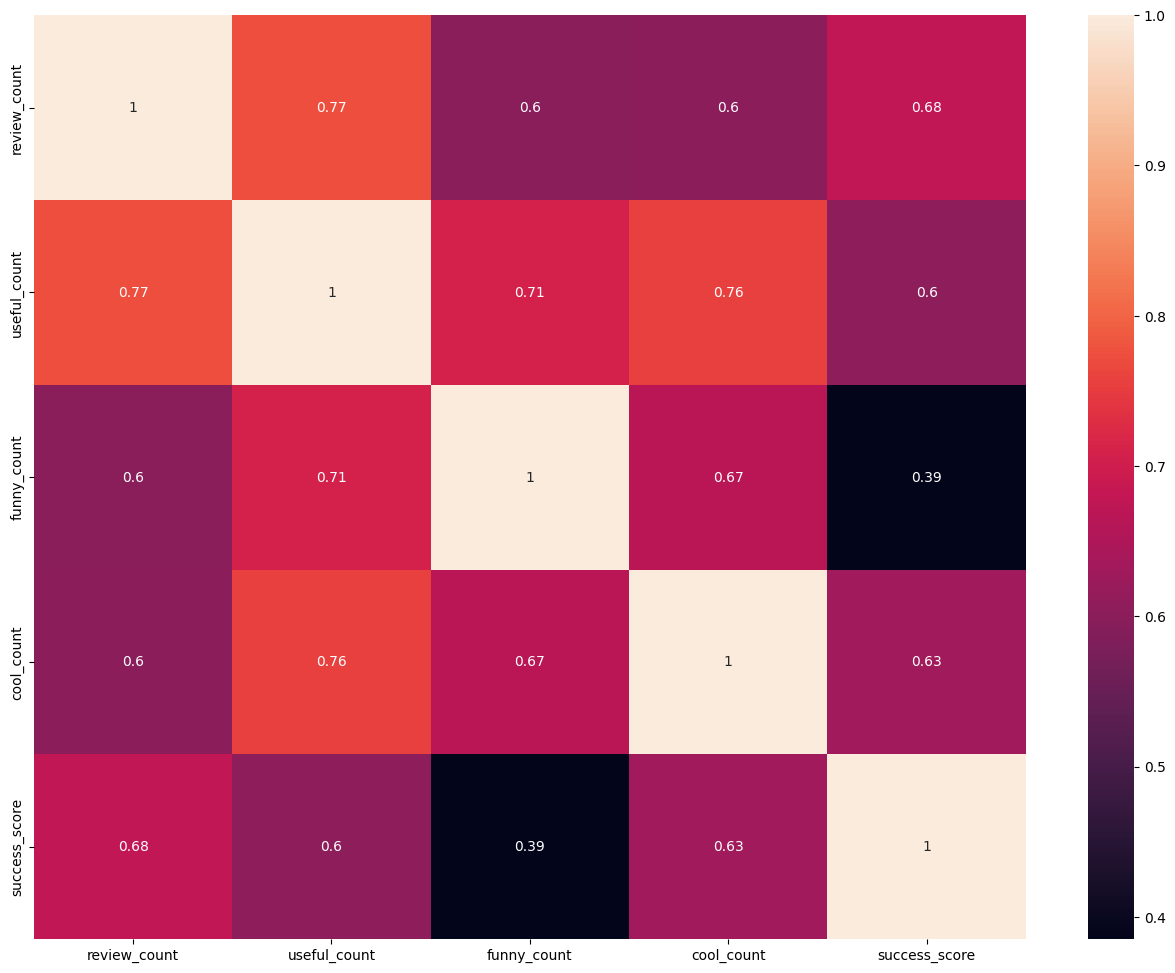

In [54]:
sns.heatmap(sentiment_df.iloc[:,2:].corr(),annot=True,linecolor='black')
plt.show()

In [55]:
#Is there any difference in engagement of elite users and non elite users?
elite_df = pd.read_sql_query("""select
                             elite, count(*) as num_users, sum(review_count) as total_review_count 
                             from (
                             select
                             case
                             when elite = '' 
                             then 'Not Elite'
                             else
                             'Elite'
                             end
                              as elite, u.review_count
                             from user u) as user_elite
                             group by 
                             elite;
""",conn)
elite_df

,elite,num_users,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


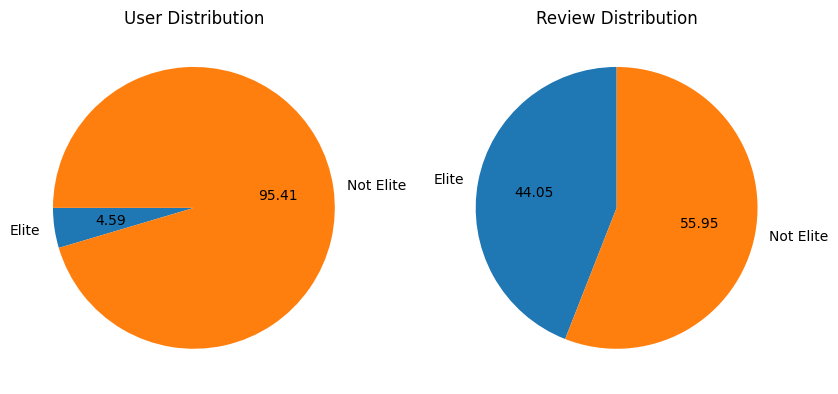

In [56]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.title('User Distribution')
plt.pie(elite_df['num_users'],labels = elite_df['elite'],autopct='%.2f',startangle=180)

plt.subplot(1,2,2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'],labels = elite_df['elite'],autopct='%.2f',startangle=90)
plt.show()

In [57]:
#Busiest Hours for Restaurants
review_engagement = pd.read_sql_query("""select
                                      cast(strftime('%H',date) as integer) as hour, count(*)
                                      as review_count
                                      from
                                      review
                                      group by
                                      hour""",conn)

tip_engagement = pd.read_sql_query("""select cast(strftime('%H',date) as integer) as hour, count(*) as tip_count from tip group by hour""",conn)


In [58]:
checkin = pd.read_sql_query(""" select date from checkin""",conn)
checkin_engagement = []

for i in checkin['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(),"%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])

checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()

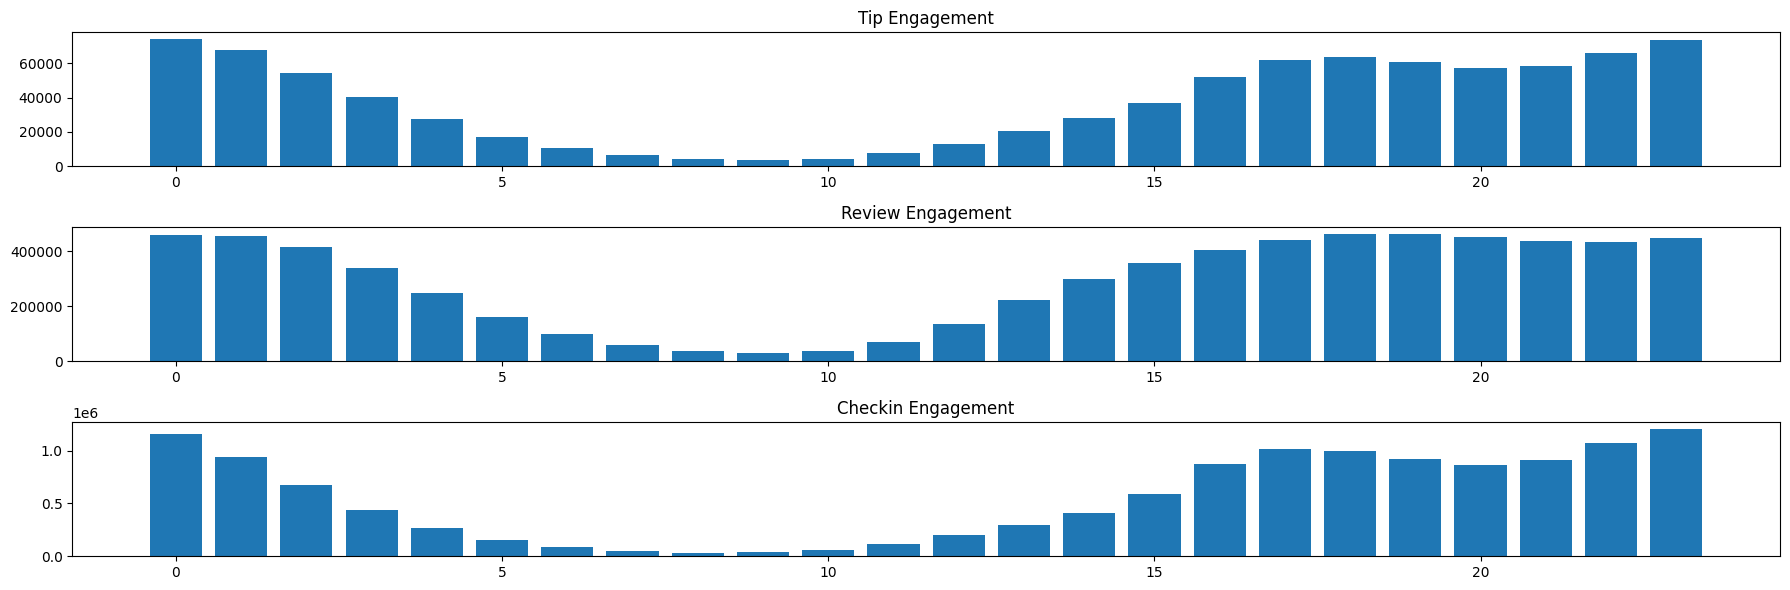

In [59]:
plt.figure(figsize=(18,6))
plt.subplot(3,1,1)
plt.title("Tip Engagement")
plt.bar(tip_engagement['hour'],tip_engagement['tip_count'])


plt.subplot(3,1,2)
plt.title("Review Engagement")
plt.bar(review_engagement['hour'],review_engagement['review_count'])


plt.subplot(3,1,3)
plt.title("Checkin Engagement")
plt.bar(checkin_engagement.index,checkin_engagement[0])

plt.tight_layout()
plt.show()